# Substance Use and Academic Performance

## Overview

[Overview Paragraph]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import nbinom, poisson
import random

## Alcohol

The research conducted by the authors of *Assessing Drinking and Academic Performance Among a Nationally Representative Sample of College Students* have a sample of 23,518 undergraduate students complete a questionarrie over their alchol use in social settings to see if there is a significant correlation between academic performance and alchol use (Piazza-Gardner et al., 2016).

In [3]:
# Study Measures
alc_quantity = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
gpa_vals = ['4', '3', '2', '1']

a_probabilities = []
b_probabilities = []
c_probabilities = []
f_probabilities = []

# Estimated probabilities for number of drinks using Poisson distribution and given means
for x in range(len(alc_quantity)-1):
    prob = poisson.pmf(x, mu=2.22)
    a_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.37)
    b_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.60)
    c_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.91)
    f_probabilities.append(prob)

# Probability for 10 or moredrinks
a_probabilities.append(1 - poisson.cdf(9, mu=2.8))
b_probabilities.append(1 - poisson.cdf(9, mu=3.6))
c_probabilities.append(1 - poisson.cdf(9, mu=3.876))
f_probabilities.append(1 - poisson.cdf(9, mu=3.748))

# Simulated Sample Data
n = 23518
data = {'GPA': [], 'Number of Drinks': []}
for student in range(n):
    gpa = random.choices(gpa_vals, weights=[0.27, 0.38, 0.21, 0.14])[0]
    if gpa == '4':
        drinks = random.choices(alc_quantity, weights=a_probabilities)[0]
    elif gpa == '3':
        drinks = random.choices(alc_quantity, weights=b_probabilities)[0]
    elif gpa == '2':
        drinks = random.choices(alc_quantity, weights=c_probabilities)[0]
    else:
        drinks = random.choices(alc_quantity, weights=f_probabilities)[0]
    data['GPA'].append(gpa)
    data['Number of Drinks'].append(drinks)

Text(0.5, 1.0, 'Distribution of the Number of Drinks Consumed by GPA')

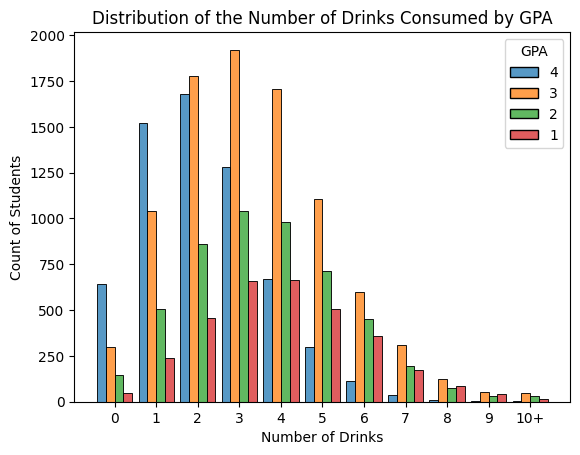

In [4]:
# convert data dict to DataFrame and ensure categorical ordering for the x-axis
df = pd.DataFrame(data)
df['Number of Drinks'] = pd.Categorical(df['Number of Drinks'], categories=alc_quantity, ordered=True)

sns.histplot(data=df, x='Number of Drinks', hue='GPA', multiple='dodge', shrink=0.85, hue_order=gpa_vals)
plt.ylabel('Count of Students')
plt.title("Distribution of the Number of Drinks Consumed by GPA")

(0.0, 2000.0)

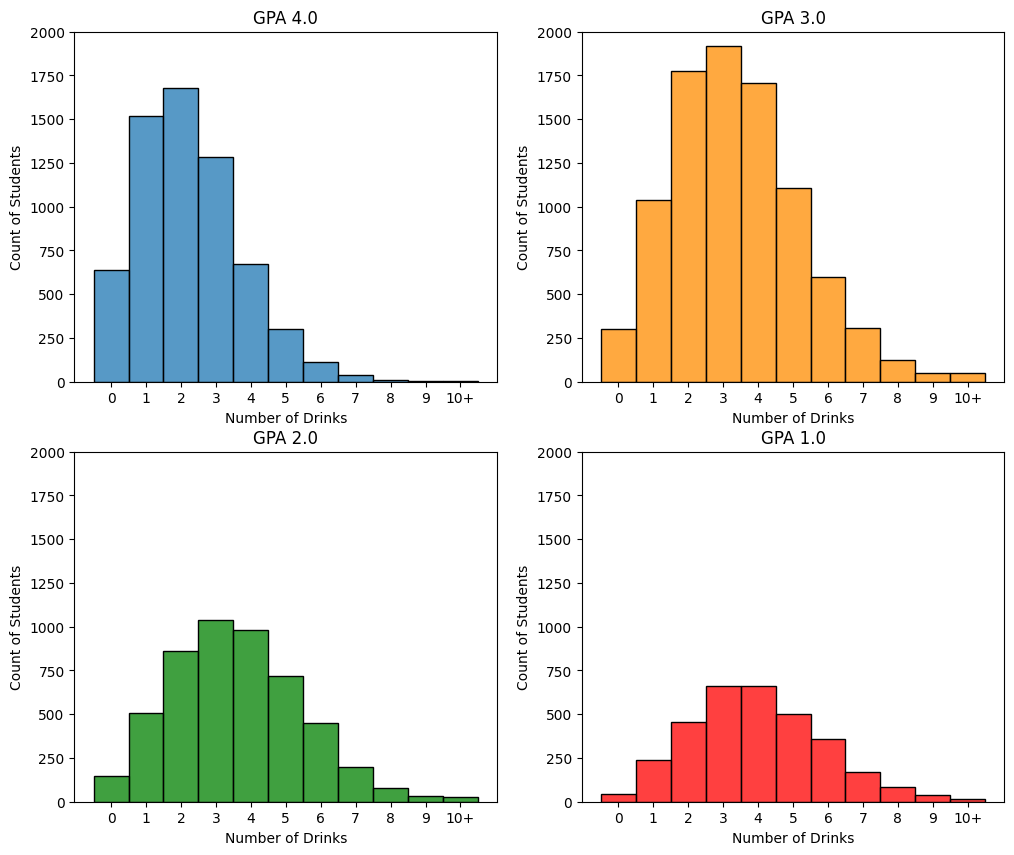

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=df[df['GPA'] == '4'], x='Number of Drinks',ax=axs[0,0])
axs[0,0].set_title('GPA 4.0')
axs[0,0].set_ylabel('Count of Students')
axs[0,0].set_ylim(0, 2000)

sns.histplot(data=df[df['GPA'] == '3'], x='Number of Drinks',ax=axs[0,1], color = 'darkorange')
axs[0,1].set_title('GPA 3.0')
axs[0,1].set_ylabel('Count of Students')
axs[0,1].set_ylim(0, 2000)

sns.histplot(data=df[df['GPA'] == '2'], x='Number of Drinks', ax=axs[1,0], color = 'green')
axs[1,0].set_title('GPA 2.0')
axs[1,0].set_ylabel('Count of Students')
axs[1,0].set_ylim(0, 2000)

sns.histplot(data=df[df['GPA'] == '1'], x='Number of Drinks', ax=axs[1,1], color = 'red')
axs[1,1].set_title('GPA 1.0')
axs[1,1].set_ylabel('Count of Students')
axs[1,1].set_ylim(0, 2000)

### Simulate the Experiment 100 Times

In [22]:
trial_data = []
for i in range(101):
    n = 23518
    data = {'GPA': [], 'Number of Drinks': []}
    for student in range(n):
        gpa = random.choices(gpa_vals, weights=[0.27, 0.38, 0.21, 0.14])[0]
        if gpa == '4':
            drinks = random.choices(alc_quantity, weights=a_probabilities)[0]
        elif gpa == '3':
            drinks = random.choices(alc_quantity, weights=b_probabilities)[0]
        elif gpa == '2':
            drinks = random.choices(alc_quantity, weights=c_probabilities)[0]
        else:
            drinks = random.choices(alc_quantity, weights=f_probabilities)[0]
        data['GPA'].append(gpa)
        data['Number of Drinks'].append(drinks)

    trial_data.append(data)

Text(0.5, 1.0, 'Distribution of the Number of Drinks Consumed by GPA')

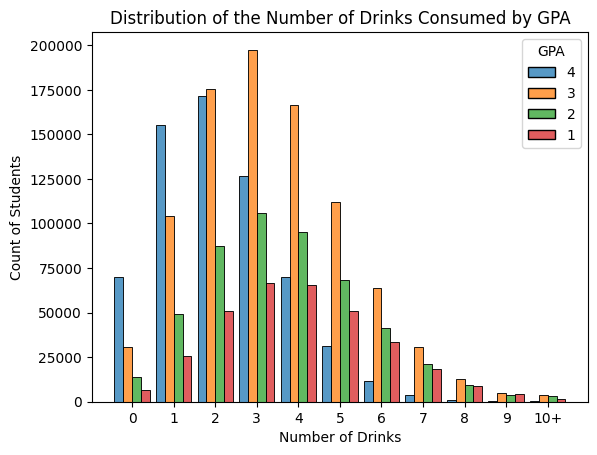

In [27]:
simulated_data = pd.concat([pd.DataFrame(d) for d in trial_data])
simulated_data['Number of Drinks'] = pd.Categorical(simulated_data['Number of Drinks'], categories=alc_quantity, ordered=True)

sns.histplot(data=simulated_data, x='Number of Drinks', hue='GPA', multiple='dodge', shrink=0.85, hue_order=gpa_vals)
plt.ylabel('Count of Students')
plt.title("Distribution of the Number of Drinks Consumed by GPA")

## Marijuana

## Vaping

In [6]:
def simulate_vaping_gpa(N=10000):
    categories = [
        "Never", "Not last 30 days", "1-2 days", "3-5 days",
        "6-9 days", "10-19 days", "20-29 days", "Daily"
    ]
    probs = np.array([0.814, 0.102, 0.025, 0.010, 0.007, 0.007, 0.018, 0.018])
    probs = probs / probs.sum()
    
    
    P_yes = {"A": 0.376, "B": 0.485, "C": 0.128, "D/F": 0.011}
    P_no  = {"A": 0.475, "B": 0.434, "C": 0.086, "D/F": 0.005}
    gpa_map = {"A":4, "B":3, "C":2, "D/F":1}
    
    yes_set = {"1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days", "Daily"}
    
    # Simulate usage
    usage = np.random.choice(categories, size=N, p=probs)
    gpa_numeric = []
    
    for u in usage:
        if u in yes_set:
            g = np.random.choice(list(P_yes.keys()), p=list(P_yes.values()))
        else:
            g = np.random.choice(list(P_no.keys()), p=list(P_no.values()))
        gpa_numeric.append(gpa_map[g])
    
    df = pd.DataFrame({"usage": usage, "GPA_numeric": gpa_numeric})
    
    # Ordered categories
    df["usage"] = pd.Categorical(df["usage"], categories=categories, ordered=True)
    gpa_order = [4, 3, 2, 1]
    df["GPA_numeric"] = pd.Categorical(df["GPA_numeric"], categories=gpa_order, ordered=True)
    
    # Compute percentages
    percent_df = (
        df.groupby(["usage", "GPA_numeric"])
          .size()
          .reset_index(name="count")
    )
    percent_df["percent"] = percent_df.groupby("usage")["count"].transform(lambda x: 100 * x / x.sum())
    
    return percent_df

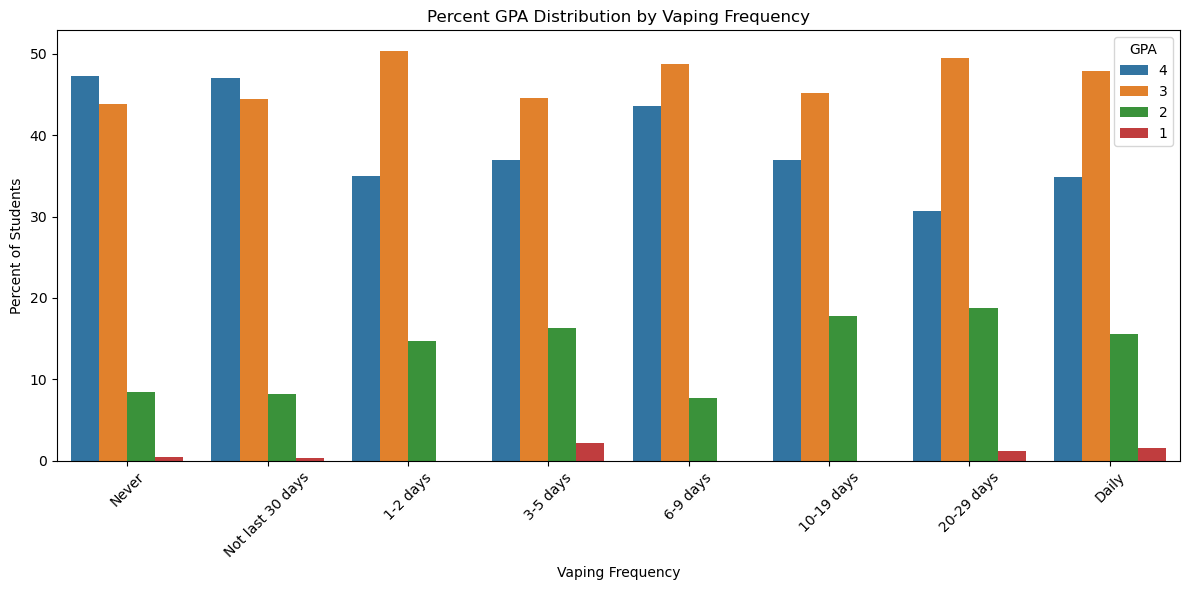

In [11]:
df_sim = simulate_vaping_gpa()

gpa_order = [4, 3, 2, 1]
plt.figure(figsize=(12,6))
sns.barplot(data=df_sim, x="usage", y="percent", hue="GPA_numeric", hue_order = gpa_order)

plt.xlabel("Vaping Frequency")
plt.ylabel("Percent of Students")
plt.title("Percent GPA Distribution by Vaping Frequency")
plt.xticks(rotation=45)
plt.legend(title="GPA")
plt.tight_layout()
plt.show()

## Simulate the Experiment 100 Times

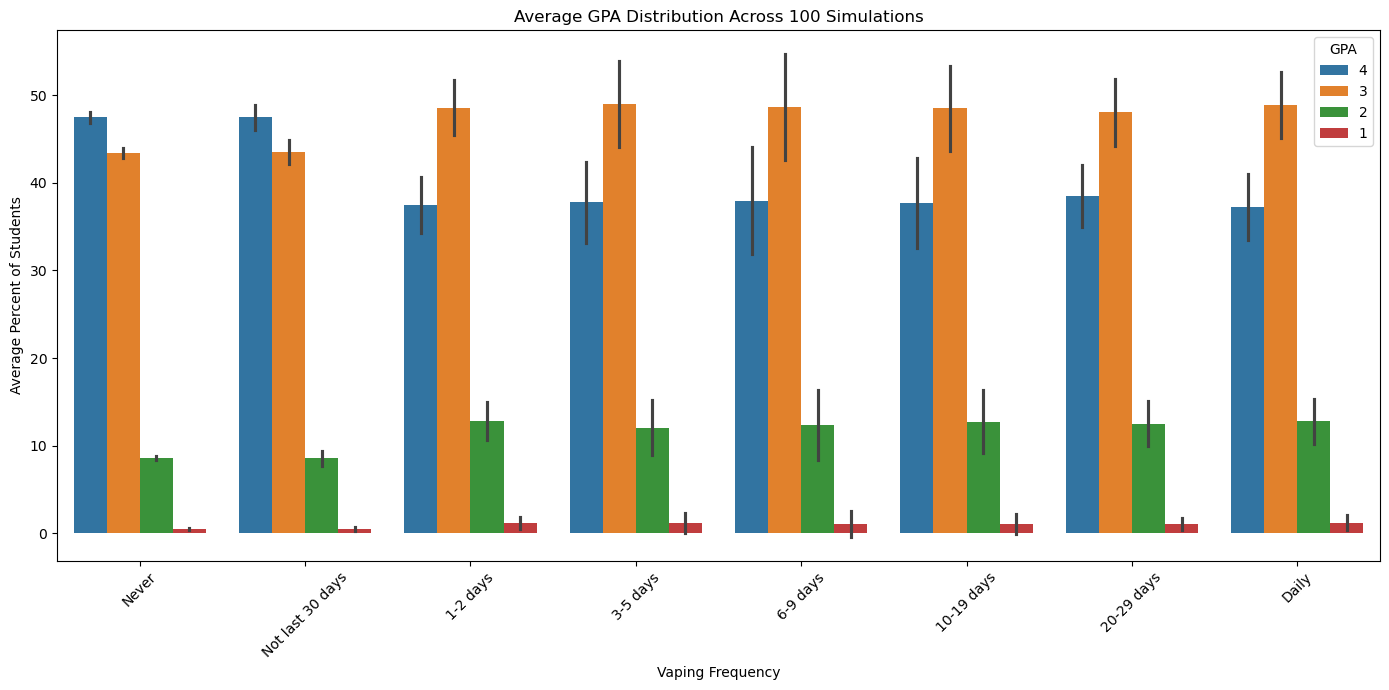

In [9]:
import warnings
warnings.filterwarnings("ignore")

simulations = 100
all_sim_results = []

for sim in range(simulations):
    df_sim = simulate_vaping_gpa()
    df_sim["sim"] = sim + 1
    all_sim_results.append(df_sim)

# Combine all simulations
all_sim_df = pd.concat(all_sim_results)

plt.figure(figsize=(14,7))
sns.barplot(
    data=all_sim_df,
    x="usage",
    y="percent",
    hue="GPA_numeric",
    hue_order=[4,3,2,1],
    palette="tab10",
    ci="sd"   # compute standard deviation automatically
)

plt.xlabel("Vaping Frequency")
plt.ylabel("Average Percent of Students")
plt.title("Average GPA Distribution Across 100 Simulations")
plt.xticks(rotation=45)
plt.legend(title="GPA")
plt.tight_layout()
plt.show()